In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

### Best Model : all features!

RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=1400)

Loading data

In [2]:
filename = '../processed_data/ALL40_48.npy'
with open(filename, 'rb') as f:
    ALL40_48 = np.load(f)

In [3]:
filename = '../processed_data/ZE_48.npy'
# open file in write mode and write data
with open(filename, 'rb') as f:
    Z = np.load(f)
    E = np.load(f)
    Y = np.load(f)

Splitting

In [4]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(ALL40_48, Y, test_size=0.20, random_state=42)

In [5]:
model = RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=1400)

Training

In [6]:
model.fit(X_train_b,y_train_b)

RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=1400)

Checking Evaluation

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
predictions = model.predict(X_test_b)
print(accuracy_score(y_test_b, predictions))

0.9930555555555556


Saving the model

In [9]:
import joblib
## save
joblib.dump(model, "./random_forest.joblib")

## load, no need to initialize the loaded_rf
#loaded_rf = joblib.load("./random_forest.joblib")

['./random_forest.joblib']

## Confusion Matrix

In [11]:
loaded_rf = joblib.load("./random_forest.joblib")

In [12]:
predictions = loaded_rf.predict(X_test_b)

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [14]:
confusion_matrix(y_test_b,predictions)

array([[ 66,   0,   0,   0,   0,   0,   0,   0],
       [  0, 153,   0,   0,   0,   0,   0,   0],
       [  0,   0, 153,   0,   0,   0,   0,   0],
       [  0,   1,   1, 176,   0,   0,   0,   0],
       [  0,   0,   0,   0, 147,   0,   0,   5],
       [  0,   0,   0,   0,   0, 147,   0,   0],
       [  0,   0,   0,   0,   0,   0, 154,   0],
       [  0,   0,   0,   0,   0,   1,   0, 148]])

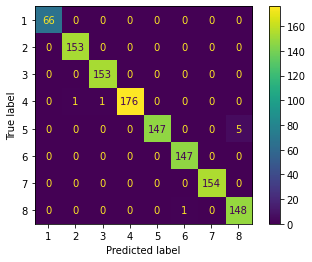

In [17]:
plot_confusion_matrix(loaded_rf, X_test_b, y_test_b)
plt.show() 